# Check to see if we're running in Colab (versus local server)

In [1]:
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

We're running Colab


In [2]:
import tensorflow as tf

print("Running TensorFlow version ",tf.__version__)

# Parse tensorflow version
import re

version_match = re.match("([0-9]+)\.([0-9]+)", tf.__version__)
tf_major, tf_minor = int(version_match.group(1)) , int(version_match.group(2))
print("Version {v:d}, minor {m:d}".format(v=tf_major, m=tf_minor) )

Running TensorFlow version  2.14.0
Version 2, minor 14


In [3]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


# Mount the Google Drive (if we're in Colab), switch current directory to a directory on the Google Drive
- we will (optionally) create the specified directory on the Google Drive if it doesn't exist

In [4]:
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/Colab Notebooks/NYU/demo"

  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)

  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
else:
    raise RuntimeError("This notebook should be run from Colab, not on the local machine")

Colab: mounting Google drive on  /content/gdrive
Mounted at /content/gdrive

Colab: making sure  /content/gdrive/My Drive/Colab Notebooks/NYU/demo  exists.

Colab: Changing directory to  /content/gdrive/My Drive/Colab Notebooks/NYU/demo
/content/gdrive/My Drive/Colab Notebooks/NYU/demo


# Work with files on the Google Drive
- existing files
- upload files to Google Drive (as per normal)
- load files from external source

In [5]:
# Verify we're in the correct working directory
%pwd

'/content/gdrive/My Drive/Colab Notebooks/NYU/demo'

## Fill the working directory from our Git repo !

In [6]:
# Let's load the working directory from our Git repo !
repo = "ML_Fall_2021"
repo_url = "https://github.com/kenperry-public/{r}.git".format(r=repo)

import os
# Clone the repo unless it is already there
repo_root = os.path.join(drive_root, repo)

# Clone or refresh from the repo depending on whether we've cloned before
if not os.path.exists( repo_root ):
  print("Cloning from Git url: ", repo_url)
  ! git clone $repo_url
else:
  print("Refreshing from Git url: ", repo_url)
  %cd $repo_root
  ! git pull


print("\nChange working directory to repo root")
%cd $repo_root

Refreshing from Git url:  https://github.com/kenperry-public/ML_Fall_2021.git
/content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021
Already up to date.

Change working directory to repo root
/content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021


## Verify that imports (of modules on the Google Drive) work

In [7]:
# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

In [8]:
import numpy as np
import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

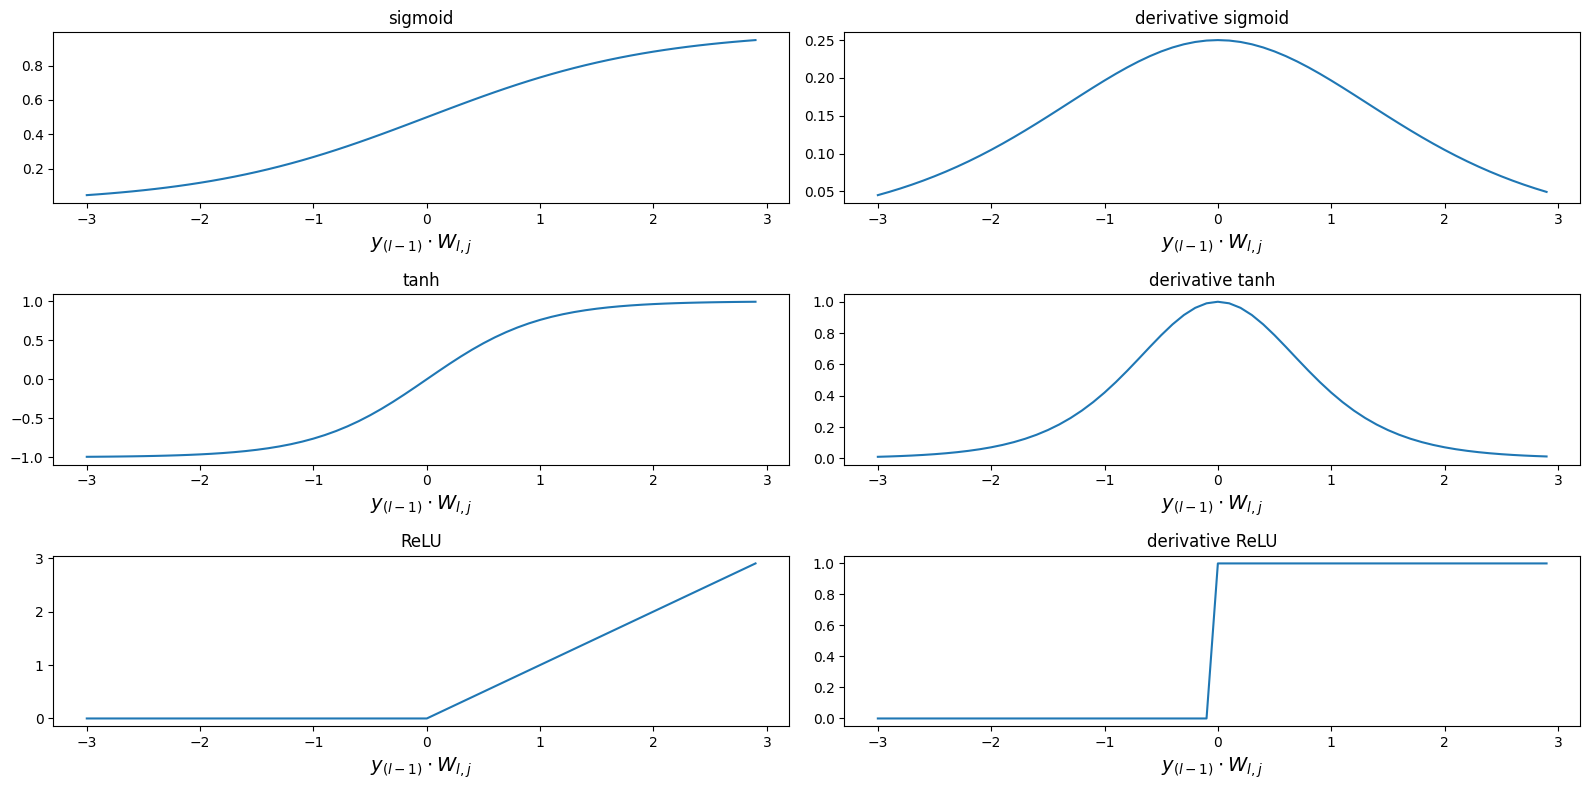

In [9]:

fig, _ = nnh.plot_activations( np.arange(-3,3, 0.1) )

# Uploading files from your local machine

It is very common for your notebook, when running on your local machine, to access files in the local directory
- modules that are imported
- data files/directories

You will need to upload these files to Colab, usually to the same directory as the notebook is running in.

There are several alternatives
- upload the files/directories manually
  - there is a file widget in the left column of the Colab interface
  - click on it to see the filesystem
  - expand the top level
  - the usual place in which to upload files is the directory named  `content`
  - place the cursor over the directory name -- three vertical dots will appear on the right
    - clicking on these dots will give you options: Upload, New folder, Delete folder, etc
  - So navigate to the directory in which you want to upload the files and choose Upload

- Use Google Drive
  - place the files/directories on your Google Drive
  - mount the Google drive (as above)
  - modify `sys.path` to include the directory on the drive from which you need to perform Python `import` (see cell below for an example)
  
- Write some code to automate the process
  - see the cells below
    - we upload a module file `helper.py`
    - we create a data directory and upload a data file `Data/shipsnet.json`

In [10]:

if IN_COLAB:
  # Upload the helper and data files to Colab
  helper_file = "helper.py"

  data_dir = "Data"
  data_file = "shipsnet.json"

  from pathlib import Path
  import os
  import sys
  from google.colab import files

  # What directory are we in ?
  notebook_dir = %pwd

  print("Current directory is: ", notebook_dir)

  # Check that the notebook directory is in sys.path
  # This is needed for the import of the helper file to succeed
  if not notebook_dir in sys.path:
    print(f"Adding {notebook_dir} to sys.path")

    sys.path.append(notebook_dir)

  # Upload the helper file (create a widget to prompt user) if needed
  helper_path = Path(notebook_dir) / helper_file
  if not helper_path.exists():
    print(f"Upload the helper file to {notebook_dir}")

    uploaded = files.upload()

  data_path = Path(notebook_dir) / data_dir
  if not data_path.is_dir():
    print(f"Creating the {data_dir} directory")
    os.makedirs(data_path)

  datafile_path = Path(notebook_dir) / data_dir / data_file

  if not datafile_path.exists():
    print(f"Upload the data file to {datafile_path}")
    print("\tThe file is large and may take a long time to upload.  Make sure it is completely uploaded before proceeding")

    print()
    print("\tAs an alternative: place the file on a Google Drive and mount the drive.")
    print("\t\tYou will have to add the path to the directory to sys.path -- see code above for modifying sys.path")

    # We will upload to the directory stored in variable data_path
    # This will necessitate changing the current directory; we will save it and restore it after the upload
    current_dir = %pwd
    %cd $data_path
    _= files.upload()

    # Restore the current working directory to the original directory
    %cd $current_dir


Current directory is:  /content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021
Adding /content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021 to sys.path
Upload the helper file to /content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021


Saving helper.py to helper.py
Creating the Data directory
Upload the data file to /content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021/Data/shipsnet.json
	The file is large and may take a long time to upload.  Make sure it is completely uploaded before proceeding

	As an alternative: place the file on a Google Drive and mount the drive.
		You will have to add the path to the directory to sys.path -- see code above for modifying sys.path
/content/gdrive/My Drive/Colab Notebooks/NYU/demo/ML_Fall_2021/Data


Saving shipsnet.json to shipsnet.json


In [11]:
print("Done")

Done
